# Section 4: Intro to Probability
Notes by Gloria Ha (2019),  Mary Richardson (2020), and Colin Hemez (2021)

In [108]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [112]:
np.version.version

'1.21.5'

### Exercises

Now that we've gone over how to do this theoretically, let's try it on some data! You can download the data from the links at the bottom of the section notes page. Let's take a look at the *sleek* data file.

In [7]:
! head sleek_data.txt

rrsrrrrsrsrrsrr
srrrrsrsssrss
rsrsssrssrssrrrrs
srrrrrrrrsrssrs
rrsssrsssrssrs
srssrsssrsssr
srrsrrrsrsssrss
srrrrrsrssrssrss
srrssrssrssrs
ssrrrrsrrrsrrrssrssrsr


Looks like some sequences of 'r' and 's' of varying length!  The fluffy dataset is similar.  Note that each file has 1000 sequences.  We can now load in the data into lists (so we'll have lists of strings).

In [11]:
# Initialize sleek and fluffy data lists
sleek_data = []
fluffy_data = []

# Load data from files
with open('sleek_data.txt') as sleek_file:
    for line in sleek_file:
        sleek_data.append(line[:-1])
        
with open('fluffy_data.txt') as fluffy_file:
    for line in fluffy_file:
        fluffy_data.append(line[:-1])
        

'rssrrrssrsrrrssrsrr'

### Exercise 1: See if you can use a simple zero order method to differentiate the birdsongs

See if you can use a simple scoring algorithm (+1 for 's' and -1 for 'r', for example) on the *sleek* and *fluffy* data to differentiate the sequences. 

I would recommend keeping two different arrays of length 1000: one for the scores you give to the sleek sequences, and one for the scores you gives to the fluffy sequences.

In [45]:
# Store length of data
num_seq = len(fluffy_data)

# Initialize score arrays
sleek_scores = np.zeros(num_seq)
fluffy_scores = np.zeros(num_seq)

# Write script to score sequences in both datasets

#Mpresley 2/27/23, write function to score single array
def ScoreSequence(seq):
    score = 0
    for n in seq:
        if (n == 'r'):
            score -= 1
        elif (n == 's'):
            score += 1
        else:
            return score
    return score


for n in range(num_seq):
    sleek_scores[n] = ScoreSequence(sleek_data[n])
    fluffy_scores[n] = ScoreSequence(fluffy_data[n])




In [24]:
def ScoreSequence(seq):
    score = 0
    for n in seq:
        if (n == 'r'):
            score -= 1
        elif (n == 's'):
            score += 1
    return score




-2

Now that you have a score for every sequence in the dataset, try plotting a **histogram** of the distribution of scores for sleek and fluffy songs. Check out `plt.hist()`.

(array([  1.,  17.,  61., 269., 315., 262.,  54.,  13.,   6.,   2.]),
 array([-14. , -11.4,  -8.8,  -6.2,  -3.6,  -1. ,   1.6,   4.2,   6.8,
          9.4,  12. ]),
 <BarContainer object of 10 artists>)

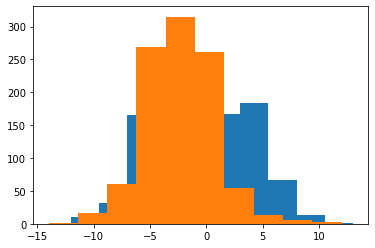

In [148]:
# Plot histogram of scores
atest = plt.hist(sleek_scores)
plt.hist(fluffy_scores)

    

In [151]:
sleek_scores

array([ -7.,   1.,   1.,  -5.,   4.,   5.,   1.,   0.,   3.,  -4.,  -4.,
        -9.,  -5.,   3.,  -1.,  -3.,   5.,  -5.,   5.,   1.,   5.,   1.,
        -1.,   2.,   3.,  -1.,  -2.,  -3.,  -3.,  -2.,   6.,  -3.,  -1.,
        -1.,   6.,   4.,  -8.,  -7.,  -1.,   4.,   1.,   1.,  -4.,   3.,
         1.,   4.,  -3.,  -6.,   3.,  -3.,  -2.,   1.,   1.,  -6.,   3.,
        -3.,   3.,   2.,   0.,   3.,  -3.,   0.,   1.,  -1.,  -7.,   1.,
         7.,  -2.,   2.,   1.,  -1.,  -5.,   4.,  -2.,   5.,   4.,  -7.,
        -6., -10.,   3.,  -3.,   0.,  -7.,  -5.,  -5.,   3.,  -9.,  -4.,
        -1.,  -9.,  -1.,  -3.,   4.,  -6.,   1.,   3.,  -1.,  -5.,  -2.,
         6.,  -1.,  13.,  -6., -11.,   1.,  -1.,  -7.,   0.,  -3.,   4.,
        -1.,   3.,   6.,  -2.,  -5.,   0.,   0.,  -5.,   5.,  -7.,  -7.,
         3.,   0.,   4.,   1.,   6.,   5.,   2.,  -4.,  -6.,  -7.,   2.,
         1.,  -6.,  -1.,   1.,   5.,  -1.,   4.,  -9.,  -1.,   0.,  -3.,
         6.,   5.,  -9.,  -1.,  -2.,  -4.,  -3.,  -

Try plotting a **ROC plot**. An easy way of going about this is to calculate the number of true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN) for each threshold score that you're considering. 

I would recommend first defining a range of threshold score values (for example, the minimum and the maximum of all of your scores), defining a linear space between those values (check out `np.linspace`), and then calculating the TP, TN, FP, FN for each threshold value. In this case, let's say that "positives" are scores above the threshold, and "negatives" are scores below the threshold (this is the typical definition). 

Remember that the ROC plot is true positive rate $\frac{TP}{TP+FN}$ vs. false positive rate $\frac{FP}{TN+FP}$.

[1.    0.999 0.999 0.999 0.999 0.995 0.985 0.958 0.919 0.862 0.815 0.736
 0.677 0.569 0.518 0.41  0.346 0.25  0.208 0.141 0.097 0.042 0.026 0.01
 0.005 0.001 0.   ]
[1.    1.    0.999 0.998 0.998 0.997 0.996 0.992 0.99  0.979 0.971 0.946
 0.925 0.859 0.801 0.663 0.533 0.348 0.255 0.137 0.079 0.038 0.018 0.01
 0.004 0.001 0.001]


Text(0.5, 0, 'False Postive Rate')

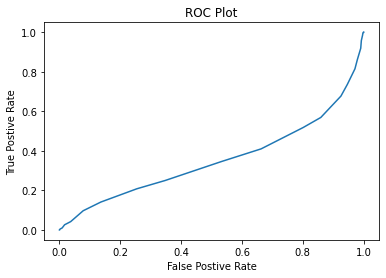

In [231]:
# Find minimum and maximum scores across both fluffy and sleek songs
min_score = -15
max_score = 15

# Define number and range of threshold scores
num_thresh = 1000
threshold_scores = np.linspace(13,-13,27)

# Set up 
TP = np.zeros(num_thresh)
FP = np.zeros(num_thresh)
TN = np.zeros(num_thresh)
FN = np.zeros(num_thresh)



# Calculate TP,FP,TN,FN for each sequence in both datasets

#Fix in the TP matrix and FN matrix
def T_F_cal(thresh, scores, T, F):
    for n in range(len(scores)):
        if (thresh >= scores[n]):
            T[n] = 1
            F[n] = 0
        else:
            F[n] = 1
            T[n] = 0



#create a function for false postive rate and true postive rate (one function can work for both)
def TPR_FPR(T,F):
    return sum(T)/(sum(T)+sum(F))


xFPR = np.array([])
yTPR = np.array([])






for score in threshold_scores:
    # first get x value
    # get the false postive True Negative array form fluffy_score, this function will modify FP and TN
    T_F_cal(score, fluffy_scores, FP, TN)
    #append sore to xFPR
    xFPR = np.append(xFPR,TPR_FPR(FP,TN))
    # now get the y value
    # get true postive and false negative from sleek_score,  this function will modify TP and FN
    T_F_cal(score, sleek_scores, TP, FN)
    #append sore to yTPR
    yTPR = np.append(yTPR,TPR_FPR(TP,FN))
    

print(yTPR)
print(xFPR)    
# Plot it!
plt.plot(xFPR,yTPR)
#plt.plot(yTPR,xFPR)
plt.title("ROC Plot")
plt.ylabel("True Postive Rate")
plt.xlabel("False Postive Rate")

In [147]:
#sum(TP)/(sum(TP)+sum(FN))

sum(FP)/(sum(FP)+sum(TN))

0.99

In [239]:
#len(sleek_data[0:500]) + len(sleek_data[500:1000])


1000

In [121]:
#Not very well, 

[1 2 3 3]


How well does this method perform in distinguishing the songs?

### Exercise 2: Train a third order Markov model

#### Exercise 2.1: Split up your data into training and testing sets

Now for the fun part!

I would recommend first splitting up the data into **training and testing sets**. You can use half of the data for training and half for testing (like the homework), or choose some other fraction (as long as the training and testing sets don't overlap)!

In [242]:
# Split up training and testing sets
sleek_test = sleek_data[0:500]
sleek_train = sleek_data[500:1000]
fluffy_test = fluffy_data[0:500]
fluffy_train = fluffy_data[500:1000]

In [626]:

# possible strings of length k
     
# The method that prints all
# possible strings of length k.
# It is mainly a wrapper over
# recursive function printAllKLengthRec()
output = []

def printAllKLength(set, k):
 
    n = len(set)
    printAllKLengthRec(set, "", n, k)
 
# The main recursive method
# to print all possible
# strings of length k
def printAllKLengthRec(set, prefix, n, k):
     
    # Base case: k is 0,
    # print prefix
    if (k == 0) :
        print(prefix)
        output.append(prefix)
        return
 
    # One by one add all characters
    # from set and recursively
    # call for k equals to k-1
    for i in range(n):
 
        # Next character of input added
        newPrefix = prefix + set[i]
         
        # k is decreased, because
        # we have added a new character
        printAllKLengthRec(set, newPrefix, n, k - 1)
 


In [628]:

set1 = ['r', 's']
k = 3
test = printAllKLength(set1, 3)
print(output)


rrr
rrs
rsr
rss
srr
srs
ssr
sss
['rrr', 'rrs', 'rsr', 'rss', 'srr', 'srs', 'ssr', 'sss', 'rrr', 'rrs', 'rsr', 'rss', 'srr', 'srs', 'ssr', 'sss']


Now we want to use our training dataset to calculate the parameters of our Markov model. There are many ways you could go about this, so don't feel like you have to follow these steps!

As discussed in section, in order to calculate the **conditional probabilities** in the Markov model (ex: $P(s|srss)$), we can calculate the unconditional probabilities of the related 4-mers and 3-mers ($P(srss)$ and $P(srs)$ in this case).

How would we go about calculating these probabilities?  We want to see how many times each 4-mer appears in the data, and how many times each 3-mer appears in the data, for both *sleek* and *fluffy* sequences.

#### Exercise 2.2: How many 4-mers and 3-mers are possible in this dataset?

One useful piece of information would be how many distinct 4-mers and 3-mers there are in the data.  We know that there are 2 states in this model: 's' and 'r'.  How many distinct 3-character and 4-character sequences are possible?  You could write them out by hand, or you could use probability (Hint: Does order matter? Are you sampling with replacement?)!

#### Exercise 2.3: Store distinct 4-mers and 3-mers in a list

Now we want to store the distinct 4-mers and 3-mers in a list. Something like `['ssss','sssr',...]` and `['sss','ssr',...]`.  Again, you could type out all possible combinations by hand, or you could harness the tools of Python to get all possible combinations (this will be even more useful with an alphabet of four letter like 'ACTG')! Check out `itertools`.  Again there are many ways to approach this, so feel free to diverge!

In [297]:
# Find all distinct 3-mer and 4-mer sequences and store them in lists
set1 = ['r', 's']

threemers = ['rrr','rrs','rsr','rss','srr','srs','ssr','sss']
fourmers = ['rrrr','rrrs','rrsr','rrss','rsrr','rrss','rsrr','rsrs','rssr','rsss','srrr','srrs','srsr','srss','ssrr','ssrs','sssr','ssss']
len(fourmers)
#len(threemers)


18

In [321]:
lst = ['rsr','rsr','rss','srr','ss']
count = lst.count('ss')
result = 0
for l in lst:
    result += l.count('ss')
        
#str = 'rsrsssrrs'
#str.count('rr')


2


In [322]:
# vowels list
vowels = ['a', 'e', 'i', 'o', 'i', 'u']

# index of 'e' in vowels
index = vowels.index('e')

print('The index of e:', index)

# element 'i' is searched
# index of the first 'i' is returned
index = vowels.index('i')


print('The index of i:', index)

The index of e: 1
The index of i: 2


In [629]:
#threemers
# Create function thats pattern and set's an returns a list of tuples 
# review tuples
#tup = ("srs",3)
test_list = ["srrssrssrss","srrssrssrss","rrrsrssrs"]
def PatternCount(pat,txt_list):
    count = 0
    for txt in txt_list:
        count += txt.count(pat)
    return (pat,count)

PatternCount('srs',test_list)
def ListPatternCount(listOfPatterns,txt_list):
    listResult = []
    for pat in listOfPatterns:
        listResult.append(PatternCount(pat,txt_list))
    return listResult



[('rrr', 1172),
 ('rrs', 1598),
 ('rsr', 1582),
 ('rss', 1897),
 ('srr', 1597),
 ('srs', 1882),
 ('ssr', 1927),
 ('sss', 846)]

Now we want to go through all of the training sequences and count how many times each 3-mer and 4-mer appears in the dataset.

#### Exercise 2.4: Find frequencies of distinct 3/4-mers in training data

Go through each sequence and identify each 3-mer and 4-mer, and update the counts of the corresponding 3-mers or 4-mers. Check out `list.index()`.

In [376]:
# Initialize counts array of 3-mers and 4-mers

threemer_counts_sleek = ListPatternCount(threemers,sleek_train)
threemer_counts_fluffy = ListPatternCount(threemers,fluffy_train)
fourmer_counts_sleek = ListPatternCount(fourmers,sleek_train)
fourmer_counts_fluffy = ListPatternCount(fourmers,fluffy_train)

# Go through each training sequence and identify 3-mers and 4-mers and update counts


In [426]:
def normListTuple(ListOfTuples):
    #First get the sum
    #The second element is the number
    total = 0
    resultList = []
    for lst in ListOfTuples:
        total += lst[1]
    for lst in ListOfTuples:
        resultList.append((lst[0],lst[1]/total))
    return resultList
    



#for a in threemer_counts_sleek:
#    print(a[1])


1.0

Now you can normalize the counts to get frequencies, which we'll use as probabilities in our Markov models.

In [445]:
# Normalize counts to get frequencies/probabilities

fourmer_prob_fluffy = dict(normListTuple(fourmer_counts_fluffy))
fourmer_prob_sleek = dict(normListTuple(fourmer_counts_sleek))
threemer_prob_fluffy = dict(normListTuple(threemer_counts_fluffy))
threemer_prob_sleek = dict(normListTuple(threemer_counts_sleek))

In [642]:
#sleek_test
threemer_prob_sleek

{'rrr': 0.09456227077021209,
 'rrs': 0.12932546643278583,
 'rsr': 0.12613618242704513,
 'rss': 0.15037474087067454,
 'srr': 0.1291660022324988,
 'srs': 0.1487800988678042,
 'ssr': 0.15308563227555413,
 'sss': 0.06856960612342529}

In [522]:
def Markov3(seq,three_prob_list,four_prob_list):
    seqCount = len(seq)  
    prob = 1
    seq_init = three_prob_list[seq[0:3]]
    for num in range(seqCount-3):
        seq3 = three_prob_list[seq[num:num+3]]
        seq4 = four_prob_list[seq[num:num+4]]
        prob = prob * (seq4/seq3)
    return prob * seq_init

def getLogScoreSleekvsFluffy(seq):
    score = np.log(Markov3(seq,threemer_prob_sleek,fourmer_prob_sleek)) - np.log(Markov3(seq,threemer_prob_fluffy,fourmer_prob_fluffy))
    return score
getLogScoreSleekvsFluffy('rsrsssrssrssrrrrs')

10.642619570494416

In [514]:
#sleek_train
np.log(Markov3('rsssrsssrssrssrs',threemer_prob_sleek,fourmer_prob_sleek)) - np.log(Markov3('rsssrsssrssrssrs',threemer_prob_fluffy,fourmer_prob_fluffy))
def 




9.361296598243127

In [476]:
for a in range(10)

0.15037474087067454

(array([  3.,  12.,  65.,  91., 140., 111.,  49.,  19.,   6.,   4.]),
 array([-2.9655049 , -0.33911559,  2.28727372,  4.91366302,  7.54005233,
        10.16644164, 12.79283094, 15.41922025, 18.04560955, 20.67199886,
        23.29838817]),
 <BarContainer object of 10 artists>)

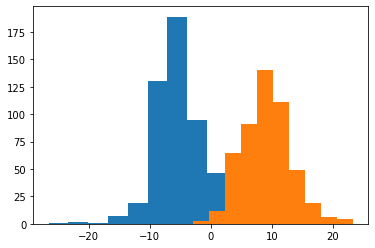

Now we've trained our models! We can simply divide the relevant 3-mer and 4-mer probabilities when calculating the conditional probabilities. All that's left to do is to test the model on distinguishing the testing set sequences as *sleek* or *fluffy*.

### Exercise 3: Test the model

Use the equation for a third order Markov chain probability to calculate the probability of each sequence given the two Markov models (*sleek* and *fluffy*). Use these probabilities to calculate the log odds score, where in this case we are dividing the probability of being *sleek* by the probability of being *fluffy*. Remember that we want to use **logs of probabilities** whenever we are multiplying/dividing them together to avoid **underflow** errors.

In [529]:
# Initialize score array
fluffy_scores = np.zeros(len(fluffy_test))
sleek_scores = np.zeros(len(sleek_test))

# Iterate through each sequence

    # For each sequence, calculate the initial probability 
    # of the first three notes under both the fluffy and sleek models

    # For each sequence, calculate the probabilities of each note (r or s) given
    # the previous three notes (starting with the fourth note) under both models

    # For each sequence, calculate a log odds score and store it
for i in range(len(sleek_test)):
    sleek_scores[i] = getLogScoreSleekvsFluffy(sleek_test[i])

for i in range(len(fluffy_test)):
    fluffy_scores[i] = getLogScoreSleekvsFluffy(fluffy_test[i])

#sleek_scores


Now you should have two arrays of scores, one for the *sleek* test dataset, and one for the *fluffy* test dataset. You can now repeat the histogram and ROC plot part of exercise 1 on these new scores. Did the model do any better? What's the **specificity** if you set a **sensitivity** threshold of 0.9 or higher? What if the *sleek* songs only made up 1% of the total songs? What would the **false discovery rate** be?

### Notes

For the purposes of this exercise, I split everything up and wrote a lot of repetitive code. In your actual homework, you can consider putting scripts into functions. If you're interested in doing more with this dataset, you could see if generating random note sequences would be distinguishable from *sleek* sequences under a zero order model. You could also see if these sequences could be better distinguished with any other order of Markov model (though, they were generated under a third order model...).

(array([  3.,  12.,  65.,  91., 140., 111.,  49.,  19.,   6.,   4.]),
 array([-2.9655049 , -0.33911559,  2.28727372,  4.91366302,  7.54005233,
        10.16644164, 12.79283094, 15.41922025, 18.04560955, 20.67199886,
        23.29838817]),
 <BarContainer object of 10 artists>)

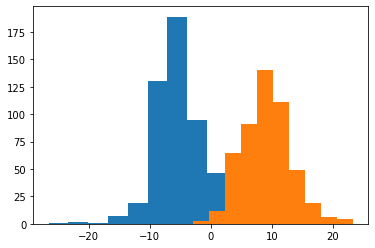

In [537]:
#Data looks alot better
plt.hist(fluffy_scores)
plt.hist(sleek_scores)


Text(0, 0.5, 'True Postive Rate')

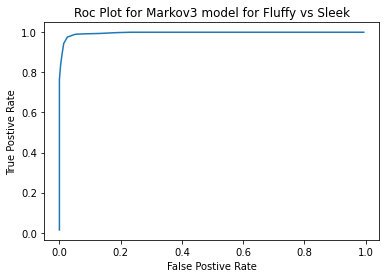

In [630]:
threshold_scores = np.linspace(20,-20,41)
#print(threshold_scores)
def roc_out(thresh_intervals,True_array,False_array):
    #intevals are the values to test as thresholds and see how they do
    xFPR = []
    yTPR = []
    #True_array and False_array must be equal
    for i in thresh_intervals:
        #create a copy of the True_array so we can modify for a single data point
        #calculate t_array first 
        t_array = np.zeros(len(True_array))
        f_array = np.zeros(len(False_array))
        for inum in range(len(True_array)):
            if(i > True_array[inum]):
                t_array[inum] = 0
            else:
                t_array[inum] = 1
            if(i > False_array[inum]):
                f_array[inum] = 0
            else:
                f_array[inum] = 1
  #      print("print t_array",t_array)
  #      print("print f_array",f_array)
        #Calculat the True Positive, False Postive, True Negative and False Negative
        TP = sum(t_array)
        FP = sum(f_array)
        TN = len(f_array) - sum(f_array)
        FN = len(t_array) - sum(t_array)
#        print("FN ",FN)
#        print("TP ",TP)
#        print("FP ",FP)
#        print("TN ",TN)
        #Calculate "False Positive Rate" and append to FPR array
        #False postive rate = FP/(FP+TN)
        xFPR.append(FP/(TN + FP))       
        #Calculate "True Positive Rate" and append to TRP array
        #True postive rate = TP/(TP+FN)
        yTPR.append(TP/(TP + FN))     
        result = {"xFPR":xFPR,'yTPR':yTPR}
    return result 
            
                
            
test_dict = roc_out(threshold_scores,sleek_scores,fluffy_scores)
plt.plot(test_dict['xFPR'],test_dict['yTPR'])
plt.title("Roc Plot for Markov3 model for Fluffy vs Sleek")
plt.xlabel("False Postive Rate")
plt.ylabel("True Postive Rate")
          
#Plot looks good, looks like the model works!

In [641]:
#threemer_prob_sleek
#fluffy_test

In [640]:
threemer_prob_sleek

{'rrr': 0.09456227077021209,
 'rrs': 0.12932546643278583,
 'rsr': 0.12613618242704513,
 'rss': 0.15037474087067454,
 'srr': 0.1291660022324988,
 'srs': 0.1487800988678042,
 'ssr': 0.15308563227555413,
 'sss': 0.06856960612342529}

array([ 20.,  19.,  18.,  17.,  16.,  15.,  14.,  13.,  12.,  11.,  10.,
         9.,   8.,   7.,   6.,   5.,   4.,   3.,   2.,   1.,   0.,  -1.,
        -2.,  -3.,  -4.,  -5.,  -6.,  -7.,  -8.,  -9., -10., -11., -12.,
       -13., -14., -15., -16., -17., -18., -19., -20.])